In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
df=pd.read_csv(r'C:\Users\asifk\Downloads\train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
print(df.shape)
df.Age.isnull().sum()


(891, 12)


177

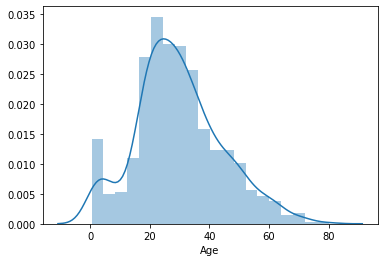

In [20]:
sns.distplot(df['Age'].dropna())

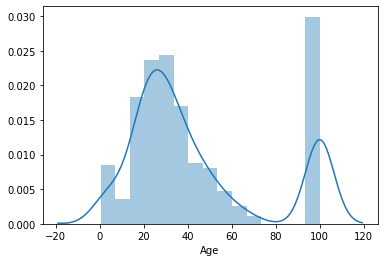

In [59]:
sns.distplot(df['Age'].fillna(100))

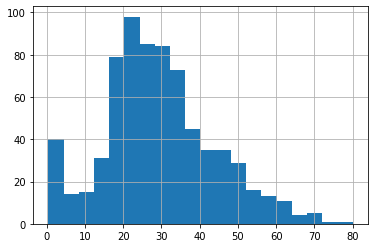

In [24]:
df.Age.hist(bins=20)

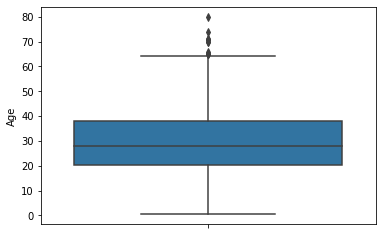

In [29]:
sns.boxplot(y=df.Age)

In [27]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
mean=(df['Age'].mean())
std=(df['Age'].std())
print(mean)
print(std)

29.69911764705882
14.526497332334044



### Gaussian Distributed

In [41]:
threshold=3
outlier=[]
for i in df.Age:
    z=(i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)
    

outlier in dataset is [80.0, 74.0]


In [48]:
uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(uppper_boundary)
print(lower_boundary)

73.27860964406095
-13.88037434994331


In [58]:
print(df.Age.max())
print(df.Age.min())

70.0
0.42


In [53]:
df.loc[df["Age"]>=70,"Age"]=70

In [54]:
print(df.Age.max())

70.0


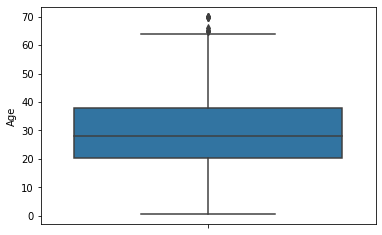

In [55]:
sns.boxplot(y=df.Age)

### If Features Are Skewed We Use the below Technique

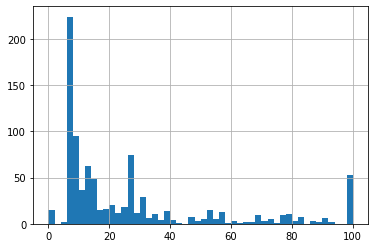

In [111]:
df.Fare.hist(bins=50)

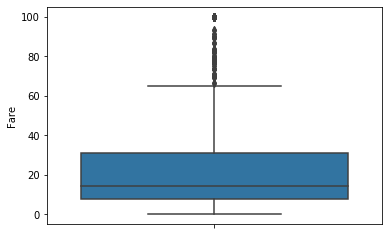

In [110]:
sns.boxplot(y=df.Fare)

In [91]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [92]:
upper_limit=df.Fare.quantile(0.75)+(IQR*1.5)
lower_limit=df.Fare.quantile(0.25)-(IQR*1.5)
print(lower_limit)
print(upper_limit)

-26.724
65.6344


In [93]:
upper_limit=df.Fare.quantile(0.75)+(IQR*3)
lower_limit=df.Fare.quantile(0.25)-(IQR*3)
print(lower_limit)
print(upper_limit)

-61.358399999999996
100.2688


In [109]:
df.loc[df['Fare']>=100,'Fare']=100